In [1]:
pip install split-folders[full]

Note: you may need to restart the kernel to use updated packages.


In [2]:
import os 
os.environ['KMP_DUPLICATE_LIB_OK']='True'
# display, transform, read, split ...
import numpy as np
import cv2 as cv
import os
import splitfolders
import matplotlib.pyplot as plt

# tensorflow
import tensorflow.keras as keras
import tensorflow as tf

# image processing
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

# model / neural network
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model

In [3]:
# split data in a new folder named data-split
splitfolders.ratio("C:/Users/exam10/Documents/Brain_Tumor/brain_tumor_dataset/", output="C:/Users/exam10/Documents/Braintumor/data-split", seed=1337, ratio=(0.7, 0.2, 0.1), group_prefix=None, move=False)

Copying files: 253 files [00:02, 107.84 files/s]


In [4]:
datagen = ImageDataGenerator()

In [5]:
# define classes name
class_names = ['yes','no']

In [6]:
# training data
train_generator = datagen.flow_from_directory( 
    directory="C:/Users/exam10/Documents/Braintumor/data-split/train/", 
    classes = class_names,
    target_size=(300, 300),  
    batch_size=32, 
    class_mode="binary", 
)

Found 176 images belonging to 2 classes.


In [7]:
# validation data
valid_generator = datagen.flow_from_directory( 
    directory="C:/Users/exam10/Documents/Braintumor/data-split/val/", 
    classes = class_names,
    target_size=(300, 300), 
    batch_size=32, 
    class_mode="binary", 
)

Found 50 images belonging to 2 classes.


In [8]:
# test data
test_generator = datagen.flow_from_directory( 
    directory="C:/Users/exam10/Documents/Braintumor/data-split/test/", 
    classes = class_names,
    target_size=(300, 300), 
    batch_size=32, 
    class_mode="binary", 
)

Found 27 images belonging to 2 classes.


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(300, 300, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [11]:
model_history =model.fit(train_generator, validation_data=valid_generator, epochs=10, batch_size=32)

Epoch 1/10
6/6 [==============================] - 14s 2s/step - loss: 631.8897 - accuracy: 0.5682 - val_loss: 98.1390 - val_accuracy: 0.7400
Epoch 2/10
6/6 [==============================] - 8s 1s/step - loss: 45.9930 - accuracy: 0.6761 - val_loss: 5.8732 - val_accuracy: 0.7800
Epoch 3/10
6/6 [==============================] - 9s 1s/step - loss: 2.8484 - accuracy: 0.8750 - val_loss: 3.3569 - val_accuracy: 0.7600
Epoch 4/10
6/6 [==============================] - 8s 1s/step - loss: 0.2986 - accuracy: 0.9205 - val_loss: 1.6889 - val_accuracy: 0.7000
Epoch 5/10
6/6 [==============================] - 8s 1s/step - loss: 0.3427 - accuracy: 0.9205 - val_loss: 1.7494 - val_accuracy: 0.7400
Epoch 6/10
6/6 [==============================] - 8s 1s/step - loss: 0.1317 - accuracy: 0.9602 - val_loss: 2.3585 - val_accuracy: 0.7600
Epoch 7/10
6/6 [==============================] - 8s 1s/step - loss: 0.1178 - accuracy: 0.9773 - val_loss: 1.8301 - val_accuracy: 0.7600
Epoch 8/10
6/6 [====================

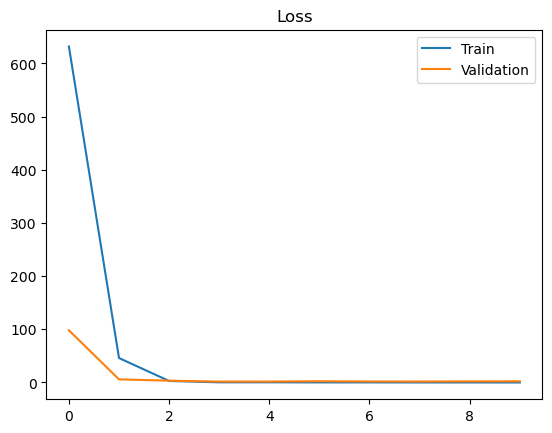

In [12]:
loss_train_curve = model_history.history["loss"]
loss_val_curve = model_history.history["val_loss"]
plt.plot(loss_train_curve, label = "Train")
plt.plot(loss_val_curve, label = "Validation")
plt.legend(loc = 'upper right')
plt.title("Loss")
plt.show()

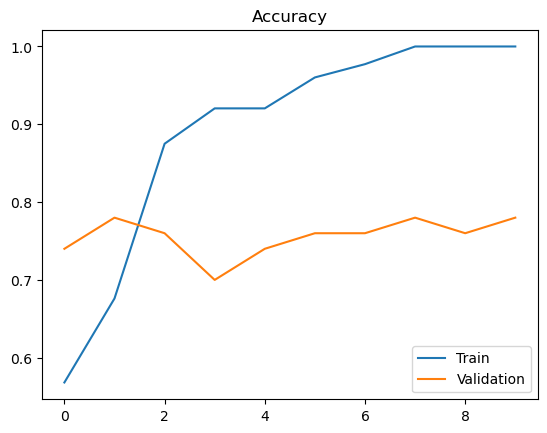

In [13]:
acc_train_curve = model_history.history["accuracy"]
acc_val_curve = model_history.history["val_accuracy"]
plt.plot(acc_train_curve, label = "Train")
plt.plot(acc_val_curve, label = "Validation")
plt.legend(loc = 'lower right')
plt.title("Accuracy")
plt.show()

In [14]:
test_loss, test_acc = model.evaluate(test_generator)
print("The test loss is: ", test_loss)
print("The best accuracy is: ", test_acc*100)

1/1 [==============================] - 0s 314ms/step - loss: 2.9516 - accuracy: 0.8148
The test loss is:  2.951634645462036
The best accuracy is:  81.4814805984497


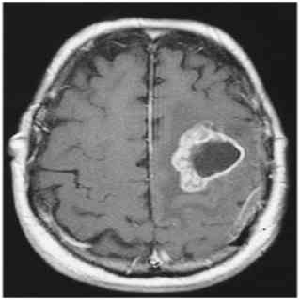

In [16]:
img = tf.keras.preprocessing.image.load_img('C:/Users/exam10/Documents/Braintumor/data-split/test/yes/Y37.jpg', target_size=(300, 300))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = np.array([img_array]) 
img

In [21]:
# generate predictions for samples
prediction = model.predict(img_array)
if prediction[0][0] > 0.5:
    print("No")
else:
    print("Yes")

1/1 [==============================] - 0s 46ms/step
Yes
